<img height="120" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/cropped-logo-fcfm-die-1.png">

# Curso EL4203 Programación avanzada **Módulo 2**
### Por *Joaquin Zepeda Valero*, basado en los apuntes del curso "CC3001 Algoritmos y Estructuras de Datos" realizados por *Patricio Poblete*.

Los objetivos de este módulo son:

1. Distingue diferentes tipos de datos, considerando sus
restricciones o limitaciones.
2. Selecciona la estructura de datos más adecuada para la
resolución de problemas en Ingeniería Eléctrica.
3. Utiliza e implementa tipos de datos en un lenguaje de
programación aplicables a problemas de la Ingeniería
Eléctrica.
4. Programa código genérico por medio de punteros a
funciones.

Contenidos:
* Complejidad computacional y notación O.
* Arreglos. 
* Punteros y listas enlazadas. 
* Árboles. 
* Pilas y colas. 
* Representación de matrices y vectores. 
* Casos de estudio de estructuras y tipos de datos.

[Referencias](https://colab.research.google.com/drive/1ej3ZGUCJu1pRP7xF0RqS4MbAOYCxvk_6?usp=sharing)

# Complejidad computacional y notación O
 
La complejidad de una función es la relación entre el tamaño de la entrada y la dificultad de ejecutar la función para completarse. En general el tamaño de la entrada es $n$, lo cual a veces más que una notación puede representar algo tangible como por ejemplo el **largo de un arreglo**. La dificultad del problema se puede medir de múltiples formas, por ejemplo una de las opciones de medir la dificultad es usando el número de operaciones básicas ( suma, resta, multiplicación y división,asignaciones a variables y llamadas a la función), pero la dificultad de ejecutar una suma vs la dificultad de ejecutar una división son bastante diferentes cómo se puede intuir (toma distintos tiempos). A pesar de esto, se utilizará el **número de operaciones básicas** como medida de la dificultad y el **tiempo de ejecución** de cada función.
 
A continuación se presenta un ejemplo:
 
```python
def f(n):
    out = 0
    for i in range(n):
        for j in range(n):
            out += i*j
    return out
```
¿Cual es la complejidad de la función $f$?
 
> sumas: $n^{2}$ \\
> restas:  0        
> divisiones: 0     \\
> multiplicaciones: $n^2$ \\
> asignaciones: $2n^2+n+1$ \\
> llamadas a la función: $0$ \\
> Total: $4n^2+1$
 
Las asignaciones corresponden a $2n^2+n+1$ pues la línea $out+= i*j$ se evalúa $n^2$ veces, además se le asignan $n^2$ veces valores a $j$ y $n$ valores a $i$ ( por cada $i$ se asignan $n$ valores de $j$ y $n$ valores de $out$, como son $n$ asignaciones para $i$, pues es un solo ciclo for de $0$ a $n$, quedan $n^2$ asignaciones para $j$ y $out$), sumando esto queda $n^2+n^2+n$ lo cual falta sumarle la asignación inicial que se realiza, es decir $out=0$ (1 asignación), quedando $2n^2+n+1$.
 
¿Cuál es el orden de la función $f$?
> Para determinar el orden de la función, se utiliza la notación de la O (Big O notation), la cual establece la relación en el aumento del número de operaciones básicas respecto al tamaño de la entrada a medida que la entrada se vuelve muy larga (o grande). Esto permite estimar que tan rápido es nuestro algoritmo en función del número de operaciones básicas tiene que realizar. \\
> Considerando un $n$ grande, el orden de esta función corresponde a $O(n^{2})$, esto pues como $n$ es muy grande, el término de mayor grado es el que predomina. \\
> Se dirá que cualquier algoritmo con una complejidad de $O(n^c)$ donde $c$ es una constante, es de **tiempo polinomial** ( y se dice **lineal** en caso de $c=1$).
 
Todo este análisis permite evaluar que tan bueno es el algoritmo realizado a partir del orden de su complejidad.

 
 


## Ejemplo: Complejidad de la función de Fibbonaci.



```python
# Función iterativa
def fib_iter(n):
    
    out = [1, 1]
    
    for i in range(2, n):
        out.append(out[i - 1] + out[i - 2])
        
    return out
```
>Número de operaciones báscias: $c⋅n$ (principalmente por el ciclo for que corre $n$ veces). Complejidad de $O(n)$.

```python
# Función recursiva
def fib_rec(n):
    
    if n <= 1:
        out = n
    else:
        out = fib_rec(n-1) + fib_rec(n-2)
        
    return out
```
>Este algoritmo realiza 2 llamadas a la función, las cuales realizan sus propias 2 llamadas a la función hasta llegar al caso base, por lo que el número de llamdas de la función va creciendo aproximadamente de la forma $2^{n}$. \\
>De todas maneras está es una aproximación, en general se dice que las funciones que sean $O(k^{n})$ con k una constante, son de **tiempo exponencial**.



## Ejemplo tiempo logaritmico


```python
def divide_by_two(n):
    
    out = 0
    while n > 1:
        n /= 2
        out += 1
        
    return out
```

La complejidad dependerá del número de veces que se ejecute el ciclo *while*. En cada ciclo el n se corta a la mitad, por lo tanto el número de iteraciones $I$ corresponde a la solución de la siguiente ecuación:
\begin{equation}
 \frac{n}{2^{I}}=1
\end{equation}
La solución de esta ecuación corresponde a $I = \log{n}$ 

\begin{align*} 
n &=  2^{I} / \log() \\ 
\log{n} &=  I
\end{align*}

Luego, la complejidad de esta función es $O(\log{n})$.

**Nota:** no importa en que base está el logaritmo pues estos son mulitplicaciones de unos y otros.


# Importancia de la complejidad

Diferente complejidad requiere diferentes tiempos de ejecución, veamos algunos ejemplos de cómo funcionan:

<div align="center">
<img height=300 src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/complexity.png">
</div>


Veamos un ejemplo real de como se comportan las curvas polinomiales (lineales), logaritmicas y exponenciales. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

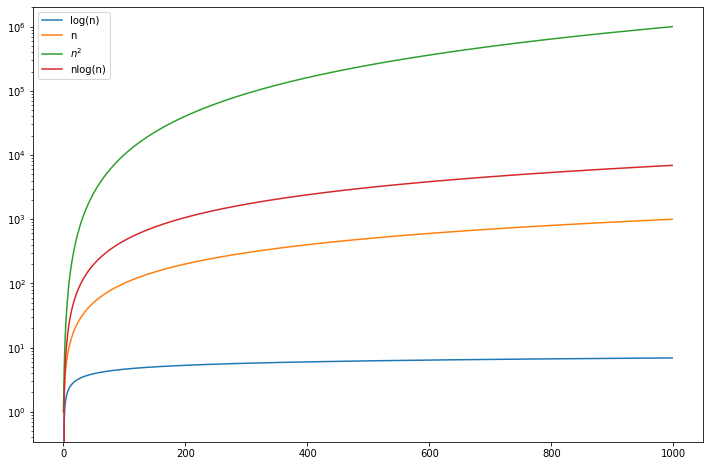

In [ ]:
plt.figure(figsize = (12, 8))
n = np.arange(1, 1e3)
plt.plot(np.log(n), label = 'log(n)')
plt.plot(n, label = 'n')
plt.plot(n**2, label = '$n^2$')
plt.plot(n*np.log(n), label = 'nlog(n)')
plt.yscale('log')
plt.legend()
plt.show()

Como se puede observar en la siguiente figura, se busca **evitar algoritmos con tiempos exponenciales** pues al aumentar el tamaño de la entrada los tiempos de ejecución se disparan.

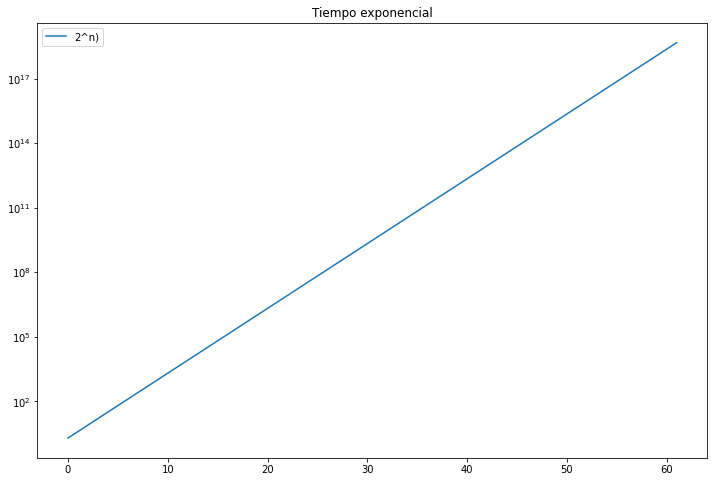

In [ ]:
plt.figure(figsize = (12, 8))
n = np.arange(1, 63)
plt.plot(2**n, label = '2^n)')
plt.legend()
plt.yscale('log')
plt.title('Tiempo exponencial')
plt.show()

Por otro lado, un algoritmo de $O(\log{n})$ es lo que se busca en general o tiempos polinómicos. \\

Ahora que tenemos estos conocimientos previos sobre la complejidad, podremos analizar, evaluar y comparar algoritmos.

Los sistemas o métodos de organización de datos que permiten un almacenamiento eficiente de la información en la memoria del computador son conocidos como estructuras de datos. Estos métodos de organización constituyen las piezas básicas para la construcción de algoritmos complejos, y permiten implementarlos de manera eficiente.

# Listas enlazadas
Una lista enlazada es una secuencia de nodos, los cuales tienen referencias al siguiente nodo (y/o al anterior). Si bien los arreglos permiten la programación de algoritmos eficientes, estos tienen una estructura rígida, por otro lado las listas enlazadas presentan una estructura mucho más flexible, utilizando el concepto de punteros. Gracias a esta flexibilidad en las estructuras es posible diseñar y utilizar algoritmos más eficientes que los de los arreglos.

## Punteros

Es un poco complicado explicar a que se corresponden los punteros en Python, pues no hay punteros de forma explícita como si los hay en otros lenguajes como por ejemplo C/C++. 

Un puntero es una referencia a un espacio de memoria, se puede decir que el puntero es la flecha que une a las listas enlazadas (que se muestran más adelante), en python no se utiliza de forma explícita los punteros como si se hace en lenguajes de más bajo nivel. Como Python es un lenguaje de alto nivel se omite la definición de punteros y Python lo hace de forma implícita con el fin de simplificar la programación.

En Python cuando se asigna una variable de la forma $a = 1$, el valor de a se guarda en un espacio de memoria. Lo que sucede es que $p$ **apunta** al objeto  $a$, así que las variables son punteros a objetos los cuales se manejan de forma implícita. 

Veamos un ejemplo de puntero en C, en este lenguaje se asigna un valor a una variable y además se asigna un puntero a otro esta variable, en donde se asigna de forma explícita que corresponde a un puntero de a un entero, que apunta la dirección de la memoria de a. Puede que sea un poco confuso, asi que además del código se mostrara una imagen. 

```c
// C code: ejemplo de puntero
int a = 1;
int* p = &a;
```
<div align="center">
<img height="150" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/ejemplo_puntero.png">
</div>


En python esto se hace de forma implícita, basta con definir una variable sin necesidad de especificar a que corresponde a un puntero o a que tipo de objeto apunta, $p$ es el puntero.
```python
# Python code: ejemplo de puntero
a = 1
p = a
a = 2
```
Cuando se asigna $a = 1$, se crea un objeto y se le asigna un espacio de memoria a esta variable, luego $p$ **apunta** a este espacio de memoria. Luego al redefinir $a = 2$, este crea otro objeto y se le asigna otro espacio de memoria, pero el puntero $p$ sigue apuntando al espacio de memoria original, por esta razón el valor de $p$ seguirá siendo $1$ por mucho que se cambie el valor de $a$. 


En resumen, los punteros son "flechas" que apuntan a las direcciones de memoria donde se guardan los objetos.

Para más información, se recomienda tomar el curso "CC3301 Programación de software de sistemas" en el cual se trabaja bastante sobre punteros, espacios de memoria, etc y se programa en C.  


In [ ]:
a = 1
p = a
a = 2
print(p)

1


## Listas enlazadas simples

Comenzaremos viendo la estructura más sencilla de este tipo: una secuencia de nodos, en que cada uno contiene una referencia al siguiente de la lista. Consideremos nodos compuestos de dos *campos* (o *atributos*): `info` y `sgte`. El primero almacena el elemento de la secuencia, y el segundo apunta al siguiente nodo. Por ejemplo, un nodo que almacena el valor $42$ y que apunta al siguiente nodo se puede representar gráficamente así:

![Nodo](https://github.com/ppoblete/AED/blob/master/Nodo.png?raw=1)

O, más simplemente:

![Nodo-circular](https://github.com/ppoblete/AED/blob/master/Nodo-circular.png?raw=1)

Para definir el formato de estos nodos utilizaremos la siguiente definición de clase, la que incluye un constructor para inicializar sus campos al crear un objeto:

In [ ]:
#Nodo de una lista enlazada simple
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte

In [ ]:
p=Nodo(42)
print(p.info, p.sgte)

42 None


El siguiente trozo de programa muestra la construcción de una lista con 4 elementos: $42$, $65$, $13$ y $44$, y un ejemplo simple de uso:

In [ ]:
primero=Nodo(42,Nodo(65,Nodo(13,Nodo(44))))
p=primero
while p is not None:
    print(p.info, end=" ")
    p=p.sgte
print()

42 65 13 44 


Algo adicional respecto de la representación gráfica. Cuando una referencia es nula (`None`), es tradicional representarla como "conectada a tierra":

![Nodo-None](https://github.com/ppoblete/AED/blob/master/Nodo-None.png?raw=1)

Al usar la representación con nodos circulares, la ausencia de un nodo siguiente la podemos representar simplemente por la ausencia de la flecha saliente:

![Nodo-circular-None](https://github.com/ppoblete/AED/blob/master/Nodo-circular-None.png?raw=1)

O, si queremos hacer explícita la ausencia de un nodo siguiente (o, en otras palabras, que el puntero al nodo siguiente es nulo), podemos representarlo por un nodo cuadrado, que es una convención que nos resultará muy conveniente más adelante, al ver *árboles*:

![Nodo-circular-cuadrado](https://github.com/ppoblete/AED/blob/master/Nodo-circular-cuadrado.png?raw=1)

Con esta última convención, la lista que construimos en el ejemplo anterior, se visualizaría así:

![lista-ejemplo](https://github.com/ppoblete/AED/blob/master/lista-ejemplo.png?raw=1)

Además, **primero corresponde a un puntero que guarda la referencia del primer Nodo de la lista.**

A continuación definiremos una clase `Lista`, que contendrá el puntero al primer nodo de la lista, así como la funcionalidad que necesitamos para operar sobre la lista:

**Nota: Es importante notar que se utiliza el atributo *head* como el puntero al primer nodo que en los diagramas anteriores se presenta como *primero*.**

In [ ]:
class Lista:
    def __init__(self):
        self.head=None
        
    def insertar_al_inicio(self,info):
        self.head=Nodo(info,self.head)
        
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)

    def eliminar_al_inicio(self):
        assert self.head is not None
        self.head=self.head.sgte

    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte

    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.head
        j=1
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    def largo(self):
        n=0
        p = self.head
        while p != None:
            n+=1
            p = p.sgte
        return n

    def __str__(self): #Permite usar print()
        s = "Lista("
        p=self.head
        while p is not None:
            s+=str(p.info)+','
            p=p.sgte
        return s[:-1]+')'

    def eliminar_ultimo(self):
        pass


Está definido los métodos para insertar elementos y para eliminar elementos de una lista, los cuales pueden ser bastante útiles pues son operaciones básicas en estas estructuras.

In [ ]:
L=Lista()
L.insertar_al_inicio(44)
L.insertar_al_inicio(13)
L.insertar_al_inicio(65)
L.insertar_al_inicio(42)
print(L)

Lista(42,65,13,44)


## Recorriendo la lista con un iterador

Para recorrer la lista se utiliza un puntero auxiliar ($p$) y luego ir avanzando este puntero. Es importante notar que se utiliza una variable auxiliar la cual va guardando los valores del nodo actual. En general se utilizará un puntero auxiliar para no modificar las referencias iniciales de la Lista.

```python
p = self.head
while p != None:
    block code
    p = p.sgte #avanzamos el puntero
```



In [ ]:
L.largo()

4

# Ejemplo: Invertir una lista enlazada

El problema a resolver corresponde a completar la función $reverse()$, la cual  invierte una lista enlazada. Esta función recibe la referencia del $head$ de la lista enlazada y retorna luego la referencia del $head$ de la lista invertida.

**Ejemplo:** Si realizamos el ejemplo con la lista $L=Lista(1,2,3)$, $reverse(L.head)$ debe modificar la lista L para que quedé con los siguientes elementos $Lista(3,2,1)$. Lo cual corresponde a la lista invertida.

<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/ejemplo_reverse.png">

Existen muchas formas de resolver este problema, generalmente para resolver este tipo de problemas se recomienda realizar en papel paso a paso lo que hay que hacer pues a partir de eso es mucho más simple definir el algoritmo que resuelve el problema, no es recomendable llegar y programar sin antes pensar en como resolver el problema. A continuación se muestra una de las formas de resolución de este ejercicio, el cual utiliza 3 punteros y recorre la lista una vez como se muestra a continuación:



<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/reverse_list.png">

Este algoritmo es de complejidad $O(n)$, pues se recorren todos los elementos 1 vez.

Gracias a los 3 punteros, la lista se puede dividir sin perder las referencias de las sublistas que se crean, de esta manera se puede ir insertando los nodos mientras se recorre la lista, veamos un ejemplo de su implementación:

In [ ]:
def reverse(head):     
    anterior = None  
    actual = head
    sgte = actual.sgte
    
    while actual!=None: # 
        actual.sgte = anterior
        anterior = actual
        actual = sgte #avanzamos
        if sgte!=None: #si es que no estamos en el ultimo elemento
            sgte = sgte.sgte #avanzamos el puntero
        head = anterior
    return head

In [ ]:
L=Lista()
L.insertar_al_inicio(3)
L.insertar_al_inicio(2)
L.insertar_al_inicio(1)
print(L)
L.head = reverse(L.head)
print(L)

Lista(1,2,3)
Lista(3,2,1)


# Nano desafío 7: eliminar último

**Problema:** Complete la clase Lista definida anteriormente, completando el método $eliminar\_ultimo()$ el cual elimina el último nodo de la lista. ¿Cual es la complejidad de la solución realizada? 

**Ejemplo:** Si realizamos el ejemplo con la lista $L=Lista(42,65,13,44)$, $L.eliminar\_ultimo()$ debe modificar la lista L para que quedé con los siguientes elementos $Lista(42,65,13)$. Lo cual corresponde a la lista sin el último Nodo. 

<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/eliminar_ultimo.png">


**Sugerencia:** visualice el funcionamiento del algoritmo en papel, para luego llevar esos pensamientos a código.

In [ ]:
L=Lista()
L.insertar_al_inicio(44)
L.insertar_al_inicio(13)
L.insertar_al_inicio(65)
L.insertar_al_inicio(42)
print(L)
L.eliminar_ultimo()
assert 'Lista(42,65,13)'==str(L)

Lista(42,65,13,44)


AssertionError: ignored

## Listas de doble enlace

Las listas de enlace simple permiten solo procesos unidireccionales, por lo que no son muy apropiadas cuando los procesos necesitan poder recorrerlas en ambas dicecciones.

Podemos mejorar esto si agregamos a los nodos una referencia al nodo *previo*, además del nodo siguiente:

![Nodo-doble](https://github.com/ppoblete/AED/blob/master/Nodo-doble.png?raw=1)

Las principales desventajas de las listas doble enlazadas son:


*   Cada nodo requiere un puntero extra, por lo que se requiere mayor espacio.
*   Para insertar o eliminar nodos requiere un poco más de tiempo pues hay 2 punteros que ajustar.




 

In [ ]:
class Nodo:
    def __init__(self, prev, info, sgte):
        self.prev=prev
        self.info=info
        self.sgte=sgte

    def __str__(self): #Permite usar print()
        return f"Nodo({self.prev.info},{self.info},{self.sgte.info})"

Luego, es posible generar una lista con doble enlace, cabe destacar que hay variaciones de estás listas, existen listas con un nodo que funciona como cabecera, otra opción son las listas circulares, en donde el siguiente nodo del último elemento de la lista corresponde al primer elemento de la lista. A continuación se presenta el ejemplo de uno de los modelos más simples de listas doblemente enlazadas.

<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/doble_enlace.png">
</div>
A continuación definiremos una clase `Lista_doble_enlace`, que contendrá el puntero al primer nodo de la lista, así como la funcionalidad que necesitamos para operar sobre la lista:

In [ ]:
class Lista_doble_enlace:
    def __init__(self):
        self.head=None

    def insertar_despues_de(self,p,info): # inserta después de nodo p
        
        if self.head == None:
            self.head = Nodo(None,info,None)
            return
        
        new_node = Nodo(p.prev,info,p.sgte)
        new_node.sgte = p.sgte   
        p.sgte = new_node
        new_node.prev = p
  
        # 7. Change previous of new_node's next node */
        if new_node.sgte is not None:
            new_node.sgte.prev = new_node
 
    def eliminar(self,p): # elimina el nodo p
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.head
        j=1
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    
    def __str__(self): #Permite usar print()
        s = "Lista_doble_enlace("
        p=self.head
        while p is not None:
            s+=str(p.info)+','
            p=p.sgte
        return s[:-1]+')'

    def ascendente(self):
        p=self.head
        while p is not None:
            yield p.info
            p=p.sgte

In [ ]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
print(L)
L.eliminar(L.k_esimo(2))
print(L)

Lista_doble_enlace(42,65,13,44)
Lista_doble_enlace(42,13,44)


In [ ]:
# prev <- info -> sgte nodo 2
print(L.k_esimo(2))

Nodo(42,13,44)


In [ ]:
print([x for x in L.ascendente()])

[42, 13, 44]


### Otros tipos de listas:
Corresponde a una lista que tiene un nodo de cabecera (header) que nos indica el comienzo de la lista. Con este tipo de nodos podemos formar una lista que puede ser recorrida en ambas direcciones.
Este nodo cabecera no contiene información útil y para todos los efectos es como si no existiera, excepto que sirve como el previo del primer nodo real de la lista. Para poder ubicarlo, lo identificaremos con el nodo "0-ésimo" de la lista. Corresponderia a un "Nodo ficticio".

![lista-ejemplo-doble-enlace](https://github.com/ppoblete/AED/blob/master/lista-ejemplo-doble-enlace.png?raw=1)

La siguiente es una definición de lista de doble enlace, con alguna de la funcionalidad que ella permite:

In [ ]:
class Lista_doble_enlace:
    def __init__(self):
        self.cabecera=Nodo(None,0,None)
        self.cabecera.prev=self.cabecera
        self.cabecera.sgte=self.cabecera
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        r=p.sgte
        p.sgte=r.prev=Nodo(p,info,r)
 
    def eliminar(self,p): # elimina el nodo p
        assert p is not self.cabecera
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is self.cabecera:
                return None
            j+=1
    
    def ascendente(self):
        p=self.cabecera.sgte
        while p is not self.cabecera:
            #Ver nota en caso de tener dudas sobre el funcionamiento de yield
            yield p.info 
            p=p.sgte

    def descendente(self):
        p=self.cabecera.prev
        while p is not self.cabecera:
            #Ver nota en caso de tener dudas sobre el funcionamiento de yield
            yield p.info
            p=p.prev

In [ ]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
print([x for x in L.ascendente()])
print([x for x in L.descendente()])

[42, 65, 13, 44]
[44, 13, 65, 42]


In [ ]:
L.eliminar(L.k_esimo(3))
print([x for x in L.ascendente()])

[42, 65, 44]


**Nota:** El uso de la expresión *yield* puede causar un poco de confusión por ser poco común, al ocupar está expresión Python entiende que al llamar la función no se devuelve un valor, sino que se obtiene un *generador*. Un *generador* se puede recorrer como una lista (como se ejemplifica cuando se itera $x$ en $L.ascendente() $), lo cual es bastante útil, pero son valores estructuras distintas. En resumen, funciona similar a un *return* pero *yield* conserva la iteración que se realiza, por lo que luego se puede iterar con respecto a ella.




#  Árboles 

Al usar nodos que hacen referencia a otros nodos, no es de ninguna manera obligatorio limitarse a estructuras lineales como las que hemos visto en las secciones anteriores: podemos construir estructuras enlazadas tan complejas como queramos.

Un árbol es una estructura similar a las listas enlazadas, pero en vez de que los nodos apunten a un nodo siguiente en forma lineal, los nodos en los árboles apuntan a un número de nodos, formando estructuras de datos no lineales y permite representar la naturaleza jerárquica de una estructura en forma gráfica.



## Veamos un mini-glosario:
<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/Arbol.png">
</div>


Acá los árboles crecen hacia abajo a diferencia de como lo hacen en la naturaleza.

*   Raiz: corresponde al nodo de nivel superior.
*   Hojas: corresponde a los nodos de niveles inferiores.
*   Rama: corresponde al conector entre nodos.

## Árboles Binarios
Corresponden a los árboles que cumplen que **cada Nodo tiene solo 2 hijos**. Un nodo apunta hacia abajo a sus hijos (izquierdo y derecho), y se dice que es el *padre* de ellos. Yendo desde un nodo hacia abajo se encuentran sus *descendientes*, y hacia arriba se encuentran sus *ancestros*.


![Nodo-arbol-binario](https://github.com/ppoblete/AED/blob/master/Nodo-arbol-binario.png?raw=1)

Al dibujarlo con nodos circulares, normalmente las líneas no llevan flecha, porque se entiende que apuntan hacia abajo:

![Nodo-arbol-binario-circular](https://github.com/ppoblete/AED/blob/master/Nodo-arbol-binario-circular.png?raw=1)


Buscar elementos en este tipo de árboles tiene una complejidad de $O(n)$ en el peor de los casos, lo cual corresponde  a recorrer todos los elementos del árbol.


In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

In [ ]:
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz

### Recorridos de Árboles Binarios

Un árbol binario es una estructura esencialmente recursiva, y las principales formas de recorrer un árbol se definen también recursivamente.
Los tres tipos de recorridos más conocidos son:

* Preorden: Visitar la raíz, recorrer el subárbol izquierdo y recorrer el subárbol derecho

* Indorden: Recorrer el subárbol izquierdo, visitar la raíz y recorrer el subárbol derecho

* Postorden: Recorrer el subárbol izquierdo, recorrer el subárbol derecho y visitar la raíz

A continuación agregamos a la definición de la clase tres métodos que imprimen en contenido del árbol en estos recorridos:

In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
def pre(p):
    if p is not None:
        print(p.info,end=" ")
        pre(p.izq)
        pre(p.der)

def ino(p):
    if p is not None:
        ino(p.izq)
        print(p.info,end=" ")
        ino(p.der)

def post(p):
    if p is not None:
        post(p.izq)
        post(p.der)
        print(p.info,end=" ")
        
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz
        
    def preorden(self):
        print("Preorden:", end=" ")
        pre(self.raiz)
        print()
        
    def inorden(self):
        print("Inorden:", end=" ")
        ino(self.raiz)
        print()
        
    def postorden(self):
        print("Postorden:", end=" ")
        post(self.raiz)
        print()


Definamos un arbol para poder ejemplificar:

In [ ]:
a=Arbol(
    Nodo(
        Nodo(
            Nodo(None,125,None),
            20,
            Nodo(
                Nodo(None,10,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(None,65,None),
                    50,
                    Nodo(None,81,None)
                ),
                20,
                None
            ),
            15,
            None
        )
       )
)

In [ ]:
a.preorden()
a.inorden()
a.postorden()

Preorden: 42 20 125 35 10 15 20 50 65 81 
Inorden: 125 20 10 35 42 65 50 81 20 15 
Postorden: 125 10 35 20 65 81 50 20 15 42 


## Graficar un árbol en 2D

Con fines educativos, se importa la función print2D() la cual permite ver de forma gráfica los árboles, no se recomienda esta función para nada más que para darse una idea de como es el árbol. Clonaremos el repositorio de github con el fin de importar algunas funciones auxiliares que nos serán de ayuda.

In [ ]:
!git clone https://github.com/joaquinzepeda/Programacion-Avanzada.git
%cd Programacion-Avanzada/funciones_auxiliares
from printTree import print2D

Cloning into 'Programacion-Avanzada'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 136 (delta 45), reused 107 (delta 19), pack-reused 0
Receiving objects: 100% (136/136), 1.55 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/Programacion-Avanzada/funciones_auxiliares


In [ ]:
b=Arbol(
    Nodo(
        Nodo(
            Nodo(None,4,None),
            2,
            Nodo(
                None,
                5,
                None
            )
        ),
        1,
        Nodo(
            Nodo(
                None,
                6,
                None
            ),
            3,
            Nodo(
                None,
                7,
                None
            )
        )
       )
)

In [ ]:
print2D(b.raiz)


                    7

          3

                    6

1

                    5

          2

                    4


In [ ]:
print2D(a.raiz)


          15

                    20

                                        81

                              50

                                        65

42

                    35

                              10

          20

                    125


# Ejemplo: Tamaño de un árbol binario
 
**Problema:**
Complete la función treeSize(), la cual recibe como parámetro la raíz de un árbol y entrega el número de nodos de este, refiriéndose al tamaño. 
 
**Ejemplos:** El tamaño de *a* es a $10$, el tamaño de *b* es $7$.
 
Nota: Considere que el tamaño de un árbol que solo tiene un nodo es 1.  

 
**Solución:** En general los problemas en las estructuras de árboles son posibles de resolver de forma recursiva, esto pues se pueden ir recorriendo los subárboles tanto izquierdo como derecho hasta llegar a los casos base. Para determinar el tamaño de un árbol, se utiliza la siguiente estrategia, primero se define el caso base en donde si la raíz del árbol es Vacío, entonces el tamaño es cero pues no tenemos ningún nodo. En caso contrario el tamaño del árbol será la suma del tamaño del subárbol izquierdo y derecho, sumándole además 1 pues corresponde al nodo actual. De esta manera se recorren los subárboles hasta llegar a las hojas.


In [ ]:
# Número de nodos en un arbol binario
def treeSize(raiz):
    if raiz == None: #caso base
        return 0
    return treeSize(raiz.izq)+treeSize(raiz.der)+1 #paso recursivo, se suma 1 por el nodo actual

print("Tamaño de a: ",treeSize(a.raiz))
print("Tamaño de b: ",treeSize(b.raiz))

#Esta función también se podría implementar como un metodo de la clase árbol.

Tamaño de a:  10
Tamaño de b:  7


# Nano desafío 8: Altura de un árbol binario

**Problema:**
Complete la función altura(), la cual recibe como parámetro la raiz de un árbol y entrega la altura de este, es decir, el número de ramas entre la raiz del árbol y la hoja más lejana. ¿Cuál es la complejidad de su solución?


**Ejemplos:** La altura de *a* es a $4$, la altura de *b* es $2$. A continuación se presenta una explicación gráfica de la altura del árbol *a*. Como se puede observar tiene 4 ramas para llegar a la hoja más lejana.

<div align="center">
<img height=450 src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/altura_arbol.png">
</div>


In [ ]:
def altura(raiz):
    pass

assert 4 == altura(a.raiz)
assert 2 == altura(b.raiz)


## Una representación alternativa para árboles binarios

Un diseño alternativo para esta estructura se basa en darle una existencia real a los nodos externos, en lugar de que sean punteros `None`. Esto nos permite asociar funcionalidad a los nodos, lo cual ejemplificamos con el recorrido en inorden:

### Árboles para representar fórmulas 

También llamados 'Expression Trees', forman la estructura de una fórmula matemática, por ejemplo la fórmula

$$
(a+1)*\left(2-\frac{1}{b}\right)
$$

se puede representar mediante el árbol:

![arbol-formula](https://github.com/ppoblete/AED/blob/master/arbol-formula.png?raw=1)

A continuación se presenta una forma de estructura para este tipo de árboles:

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self):
        self.izq.postorden()   
        self.der.postorden()
        print(self.info, end=" ")

class Nodoe:
    def __init__(self, info=""):
        self.info=info
    def postorden(self):
        print(self.info, end=" ")

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz        
    def postorden(self):
        print("Postorden:", end=" ")
        self.raiz.postorden()
        print()

In [ ]:
formula= Arbol(
            Nodoi(
                Nodoi(Nodoe("a"),"+",Nodoe("1")),
                "*",
                Nodoi(
                    Nodoe("2"),
                    "-",
                    Nodoi(Nodoe("1"),"/",Nodoe("b"))
                )
            )
        )

In [ ]:
formula.postorden()

Postorden: a 1 + 2 1 b / - * 


El resultado de este recorrido en postorden es la misma fórmula escrita en *notación polaca de postfijo* (también llamada *notación polaca reversa* o, más simplemente, *notación polaca*).
Esta notación, inventada en 1924 por el lógico polaco Jan Łukasiewicz, se caracteriza porque el operador va a continuación de los operandos, mientras que en la notación usual (llamada de *infijo*) el operador va entre los operandos. Por ejemplo, la fórmula "$a+b$" se escribe en notación polaca como "$a b +$".

La notación polaca tiene varias ventajas.
Una de ellas es que no necesita paréntesis. Por ejemplo, si no consideramos prioridad de operadores (que es una forma implícita de parentizar), la fórmula "$a+b*c$" sería ambigua, porque podría significar "$(a+b)*c$" o "$a+(b*c)$". En notación polaca no habría ambigüedad, porque la primera se escribiría"$ab+c*$", y la segunda sería "$abc*+$".

Otra ventaja es que una fórmula en notación polaca se puede evaluar en una sola pasada de izquierda a derecha haciendo uso de una estructura llamada *pila* o *stack*.

# Pilas ("*Stacks*")

Una **pila**, también llamada *stack* o *pushdown* en inglés, es una lista de elementos en la cual todas las operaciones se realizan solo en un extremo de la lista.

Es usual visualizar la pila creciendo verticalmente hacia arriba, y llamamos "tope" a su extremo superior:

![pila](https://github.com/ppoblete/AED/blob/master/pila.png?raw=1)

Las dos operaciones básicas son **push** (apilar), que agrega un elemento encima de todos, y **pop** (desapilar), que extrae el elemento del tope de la pila. Más precisamente, si `s` es un objeto de tipo Pila, están disponibles las siguientes operaciones:

* `s.push(x)`: apila x en el tope de la pila `s`
* `x=s.pop()`: extrae y retorna el elemento del tope de la pila `s`
* `b=s.is_empty()`: retorna verdadero si la pila `s` está vacía, falso si no

Dado que los elementos salen de la pila en el orden inverso en que ingresaron, esta estructura también se conoce como "lista LIFO", por "Last-In-First-Out".

## Implementación usando listas de Python

Es posible implementar una pila muy fácilmente usando las listas que provee el lenguaje Python:

In [ ]:
class Pila:
    def __init__(self):
        self.s=[]
    def push(self,x):
        self.s.append(x)
    def pop(self):
        assert len(self.s)>0
        return self.s.pop() # pop de lista, no de Pila
    def is_empty(self):
        return len(self.s)==0

In [ ]:
a=Pila()
a.push(10)
a.push(20)
print(a.pop())
a.push(30)
print(a.pop())
print(a.pop())

20
30
10


Esta implementación simple posiblemente sirve en la mayoría de los casos, pero si necesitamos poder garantizar su eficiencia, tenemos el problema que la implementación de las listas de Python está fuera de nuestro control, y no podemos garantizar, por ejemplo, que cada una de las operaciones tome tiempo constante.

Por ese motivo, es útil contar con implementaciones en que sí podamos dar ese tipo de garantía.

## Implementación usando un arreglo

Utilizaremos un arreglo $s$, en donde los elementos de la pila se almacenarán en los casilleros $0,1,\ldots$, con el elemento del tope en el casillero ocupado de más a la derecha. Mantendremos una variable $n$ para almacenar el número de elementos presentes en la pila, y el arreglo tendrá un tamaño máximo, el que se podrá especificar opcionalmente al momento de crear la pila.

![pila-arreglo](https://github.com/ppoblete/AED/blob/master/pila-arreglo.png?raw=1)

In [ ]:
import numpy as np
class Pila:  
    def __init__(self,maxn=100):
        self.s=np.zeros(maxn)
        self.n=0
    def push(self,x):
        assert self.n<len(self.s)-1
        self.s[self.n]=x
        self.n+=1     
    def pop(self):
        assert self.n>0 
        self.n-=1
        return self.s[self.n]
    def is_empty(self):
        return self.n==0

In [ ]:
a=Pila()
a.push(10)
a.push(20)
print(a.pop())
a.push(30)
print(a.pop())
print(a.pop())

20.0
30.0
10.0


Esta implementación es muy eficiente: no solo es evidente que cada operación toma tiempo constante, sino además esa constante es muy pequeña. Sin embargo, tiene la limitación de que es necesario darle un tamaño máximo al arreglo, el cual a la larga puede resultar insuficiente.

Existe una manera de copiar todos los elementos a un arreglo más grande y seguir operando cuando el arreglo se llena. Si el nuevo arreglo es del doble del tamaño anterior, el costo de copiar todos los elementos se puede _amortizar_ a lo largo de las operaciones, de modo que en _promedio_ sea constante, pero se pierde la propiedad de que las operaciones tomen tiempo constante en el peor caso.

La siguiente es otra alternativa de implementación, que no sufre de ese problema.

## Implementación usando una lista enlazada

En esta implementación los elementos de la pila se almacenan en una lista de enlace simple (sin cabecera), en que el elemento del tope de la pila es el primero de la lista.

![pila-lista](https://github.com/ppoblete/AED/blob/master/pila-lista.png?raw=1)

In [ ]:
class NodoLista:
    def __init__(self,info,sgte=None):
        self.info=info
        self.sgte=sgte
class Pila:
    def __init__(self):
        self.tope=None
    def push(self,x):
        self.tope=NodoLista(x,self.tope)
    def pop(self):
        assert self.tope is not None
        x=self.tope.info
        self.tope=self.tope.sgte
        return x
    def is_empty(self):
        return self.tope is None
    

In [ ]:
a=Pila()
a.push(10)
a.push(20)
print(a.pop())
a.push(30)
print(a.pop())
print(a.pop())

20
30
10


# Colas ("*Queues*")

Una cola es una lista en que los elementos ingresan por un extremo y salen por el otro. Debido a que los elementos van saliendo en orden de llegada, una cola también se llama "lista FIFO", por "First-In-First-Out".

![cola](https://github.com/ppoblete/AED/blob/master/cola.png?raw=1)

Las dos operaciones básicas son **enq** (encolar), que agrega un elemento al final de todos, y **deq** (desencolar), que extrae el elemento que encabeza la cola. Más precisamente, si `q` es un objeto de tipo Cola, están disponibles las siguientes operaciones:

* `q.enq(x)`: encola x al final de la cola `q`
* `x=q.deq()`: extrae y retorna el elemento a la cabeza de la cola `q`
* `b=q.is_empty()`: retorna verdadero si la cola `q`está vacía, falso si no

### Implementación usando listas de Python

Tal como hicimos en el caso de las pilas, es muy simple implementar colas usando las listas de Python, pero no tenemos mucho control sobre la eficiencia del resultado:

In [ ]:
class Cola:
    def __init__(self):
        self.q=[]
    def enq(self,x):
        self.q.insert(0,x)
    def deq(self):
        assert len(self.q)>0
        return self.q.pop()
    def is_empty(self):
        return len(self.q)==0
    

In [ ]:
a=Cola()
a.enq(72)
a.enq(36)
print(a.deq())
a.enq(20)
print(a.deq())
print(a.deq())
a.enq(61)
print(a.deq())

72
36
20
61


### Implementación usando un arreglo

De manera análoga a lo que hicimos en el caso de la pila, podemos almacenar los $n$ elementos de la cola usando posiciones contiguas en un arreglo, por ejemplo, las $n$ primeras posiciones.
Pero hay un problema: como la cola crece por un extremo y se achica por el otro, ese grupo de posiciones contiguas se va desplazando dentro del arreglo, y después de un rato choca contra el otro extremo. La solución es ver al arreglo como _circular_, esto es, que si el arreglo tiene tamaño $maxn$, a continuación de la posición $maxn-1$ viene la posición $0$. Esto se puede hacer fácilmente usando aritmética módulo $maxn$.

Para la implementación, utilizaremos un subíndice $cabeza$ que apunta al primer elemento de la cola, y una variable $n$ que indica cuántos elementos hay en la cola.
La siguiente figura muestra dos situaciones en que podría encontrarse el arreglo:

![cola-arreglo](https://github.com/ppoblete/AED/blob/master/cola-arreglo.png?raw=1)

In [ ]:
import numpy as np
class Cola:  
    def __init__(self,maxn=100):
        self.q=np.zeros(maxn)
        self.n=0
        self.cabeza=0
    def enq(self,x):
        assert self.n<len(self.q)-1
        self.q[(self.cabeza+self.n)%len(self.q)]=x
        self.n+=1      
    def deq(self):
        assert self.n>0
        x=self.q[self.cabeza]
        self.cabeza=(self.cabeza+1)%len(self.q)
        self.n-=1
        return x
    def is_empty(self):
        return self.n==0

In [ ]:
a=Cola(3) # para forzar circularidad
a.enq(72)
a.enq(36)
print(a.deq())
a.enq(20)
print(a.deq())
print(a.deq())
a.enq(61)
print(a.deq())

72.0
36.0
20.0
61.0


### Implementación usando una lista enlazada

El operar en los dos extremos de la cola sugiere de inmediato el uso de una lista de doble enlace, y esa es una opción posible. Pero, como veremos, se puede implementar una cola con una lista de enlace simple:

![cola-lista](https://github.com/ppoblete/AED/blob/master/cola-lista.png?raw=1)

Una cosa que complica un poco la programación es que el invariante que se ve a la derecha se cumple solo si la cola es no vacía. Para una cola vacía, los dos punteros (primero y último) son nulos. Por lo tanto, un `enq` sobre una cola vacía, y un `deq` que deja una cola vacía serán casos especiales.

In [ ]:
class NodoLista:
    def __init__(self,info,sgte=None):
        self.info=info
        self.sgte=sgte
class Cola:
    def __init__(self):
        self.primero=None
        self.ultimo=None
    def enq(self,x):
        p=NodoLista(x)
        if self.ultimo is not None: # cola no vacía, agregamos al final
            self.ultimo.sgte=p
            self.ultimo=p
        else: # la cola estaba vacía
            self.primero=p
            self.ultimo=p
    def deq(self):
        assert self.primero is not None
        x=self.primero.info
        if self.primero is not self.ultimo: # hay más de 1 elemento
            self.primero=self.primero.sgte
        else: # hay solo 1 elemento, el deq deja la cola vacía
            self.primero=None
            self.ultimo=None
        return x
    def is_empty(self):
        return self.primero is None

In [ ]:
a=Cola()
a.enq(72)
a.enq(36)
print(a.deq())
a.enq(20)
print(a.deq())
print(a.deq())
a.enq(61)
print(a.deq())

72
36
20
61


### Aplicaciones de colas

Las colas se utilizan en los sistemas operativos siempre que hay algún recurso que no puede ser compartido. Uno de los procesos que lo requieren tiene acceso al recurso, mientras los demás deben esperar en una cola. Un ejemplo de esto son los sistemas de "spooling" para las impresoras.

También se usan mucho en sistemas de simulación, cuando se deben modelar situaciones del mundo real en que hay colas. Por ejemplo, la caja en un supermercado.

A continuación veremos una aplicación análoga a la que vimos en el caso de pilas para el recorrido de un árbol binario.

#### Recorrido de un árbol binario por niveles

Supongamos que se desea recorrer un árbol binario, visitando sus nodos en orden de su distancia a la raíz.
No hay manera de escribir esto de manera recursiva, pero el problema se puede resolver usando el mismo enfoque que utilizamos al recorrer un árbol binario en preorden de manera no recursiva, pero usando una cola en lugar de una pila.

In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz
        
    def niveles(self):
        print("Recorrido por niveles:", end=" ")
        c=Cola()
        c.enq(self.raiz)
        while not c.is_empty():
            p=c.deq()
            if p is not None:
                print(p.info, end=" ")
                c.enq(p.izq)
                c.enq(p.der)
        print()

In [ ]:
a=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(None,65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

In [ ]:
a.niveles()

Recorrido por niveles: 42 20 95 15 35 90 30 72 65 81 


## Colas de Prioridad

Hay muchas situaciones en que los elementos que esperan en una cola deben ir siendo atendidos no por orden de llegada, sino de acuerdo a algún criterio de _prioridad_.
En esos casos, no nos sirve la cola como la hemos visto, sino que se necesita un nuevo tipo de estructura.

Una cola de prioridad es un TDA que consiste de un conjunto de datos que poseen un atributo (llamado su _prioridad_) perteneciente a algún conjunto ordenado, y en el cual se pueden ejecutar dos operaciones básicas: **insertar** un nuevo elemento con una prioridad cualquiera y **extraer** el elemento de máxima prioridad.

Más específicamente, las operaciones permitidas son:

* `q.insert(x)`: inserta un elemento de prioridad x en la cola de prioridad `q`
* `x=q.extract_max()`: extrae y retorna el elemento de máxima prioridad de la cola de prioridad `q`
* `b=q.is_empty()`: retorna verdadero si la cola de prioridad `q`está vacía, falso si no

Definir qué significa tener "máxima prioridad" depende de la aplicación que queramos darle a la cola de prioridad. En los ejemplos de este capítulo, supondremos que mejor prioridad corresponde a un mayor valor numérico, pero por simetría también sería válido el criterio opuesto.

### Implementación usando una lista desordenada

La implementación más simple consiste en mantener el conjunto como una lista desordenada. Agregar un elemento es trivial, pero encontrar el máximo requiere tiempo $\Theta(n)$.

La lista se puede mantener ya sea en un arreglo o en una lista enlazada. Para nuestro ejemplo, utilizaremos una lista enlazada con cabecera.

In [ ]:
class NodoLista:
    def __init__(self,info,sgte=None):
        self.info=info
        self.sgte=sgte
class Cola_de_prioridad:
    def __init__(self):
        self.cabecera=NodoLista(0)
    def insert(self,x):
        self.cabecera.sgte=NodoLista(x,self.cabecera.sgte)
    def extract_max(self):
        assert self.cabecera.sgte is not None
        p=self.cabecera # apunta al previo del candidato a máximo
        r=self.cabecera.sgte
        while r.sgte is not None:
            if r.sgte.info>p.sgte.info:
                p=r
            r=r.sgte
        x=p.sgte.info # anotamos el valor máximo
        p.sgte=p.sgte.sgte # eliminamos el nodo con el máximo
        return x
    def is_empty(self):
        return self.cabecera.sgte is None

In [ ]:
a=Cola_de_prioridad()
a.insert(45)
a.insert(12)
a.insert(30)
print("max=",a.extract_max())
a.insert(20)
print("max=",a.extract_max())

max= 45
max= 30


### Implementación usando una lista ordenada

Una implementación un poco más compleja consiste en mantener el conjunto como una lista ordenada. Agregar un elemento requiere recorrer la lista para encontrar el punto de inserción (tiempo $\Theta(n)$ en el peor caso), pero encontrar el máximo y extrarlo toma tiempo constante si la lista se ordena de mayor a menor.

In [ ]:
class NodoLista:
    def __init__(self,info,sgte=None):
        self.info=info
        self.sgte=sgte
class Cola_de_prioridad:
    def __init__(self):
        self.cabecera=NodoLista(0)
    def insert(self,x):
        p=self.cabecera # al final apuntará al previo del punto de inserción
        while p.sgte is not None and x<p.sgte.info:
            p=p.sgte        
        p.sgte=NodoLista(x,p.sgte)
    def extract_max(self):
        assert self.cabecera.sgte is not None
        x=self.cabecera.sgte.info # anotamos el valor máximo que está en el primer nodo
        self.cabecera.sgte=self.cabecera.sgte.sgte # eliminamos el primer nodo
        return x
    def is_empty(self):
        return self.cabecera.sgte is None

In [ ]:
a=Cola_de_prioridad()
a.insert(45)
a.insert(12)
a.insert(30)
print("max=",a.extract_max())
a.insert(20)
print("max=",a.extract_max())

max= 45
max= 30


Las dos implementaciones que hemos visto están en extremos opuestos desde el punto de vista de su eficiencia. En ambas, una oparación toma tiempo constante ($\Theta(1)$) mientras la otra toma tiempo lineal ($\Theta(n)$).

Veremos a continuación que es posible diseñar una estructura que equilibre de mejor forma el costo de las dos operaciones.

### Implementación usando un _Heap_

Un heap es un árbol binario de una forma especial, que permite su almacenamiento sin usar punteros.

Este árbol se caracteriza porque tiene todos sus niveles llenos, excepto posiblemente el último, y en ese último nivel, los nodos están lo más a la izquierda posible.

![heap-arbol](https://github.com/ppoblete/AED/blob/master/heap-arbol.png?raw=1)

Un árbol que cumpla esta condición diremos que tiene "forma de heap".

Los números bajo cada nodo corresponde a una numeración por niveles, y esa numeración se utiliza para almacenar cada elemento en el casillero respectivo de un arreglo:

![heap-arreglo](https://github.com/ppoblete/AED/blob/master/heap-arreglo.png?raw=1)

Este arreglo contiene toda la información necesaria para representar al árbol. En efecto, tenemos que la raíz está en el casillero $0$, y además

$$
\begin{align}
\text{hijos del nodo }j &= \{2j+1,2j+2\} \\
\text{padre del nodo }k &= \left\lfloor \frac{k-1}{2} \right\rfloor
\end{align}
$$

Si hay $n$ casilleros ocupados en el arreglo, cualquier subíndice que sea mayor o igual a $n$ corresponde a un nodo inexistente.

Un heap puede utilizarse para implementar una cola de prioridad almacenando los datos de modo que las llaves estén siempre ordenadas de arriba a abajo (a diferencia de un árbol de búsqueda binaria, que ordena sus llaves de izquierda a derecha). En otras palabras, el padre debe tener siempre mejor prioridad que sus hijos. Un árbol que cumple esta condición diremos que tiene "orden de heap", y también se dice que es un "árbol de prioridad".

Por lo tanto, un heap debe satisfacer un invariante consistente en dos condiciones:

* Condición estructural: el árbol debe tener "forma de heap"
* Condición de orden: el árbol debe tener "orden de heap"

#### Inserción

La inserción se realiza agregando el nuevo elemento en la primera posición libre del heap, esto es, el próximo nodo que debería aparecer en el recorrido por niveles o, equivalentemente, un casillero que se agrega al final del arreglo.

Después de agregar este elemento, la condición estructural se cumple, pero la condición de orden no tiene por qué cumplirse. Para resolver este problema, si el nuevo elemento es mayor que su padre, se intercambia con él, y ese proceso se repite mientras sea necesario. Una forma de describir esto es diciendo que el nuevo elemento "trepa" en el árbol hasta alcanzar el nivel correcto según su prioridad.

![heap-ins](https://github.com/ppoblete/AED/blob/master/heap-ins.gif?raw=1)

Como la altura del árbol es $\log_2{n}$ y en cada nivel se hace un trabajo constante, el tiempo que demora esta operación en el peor caso es $\Theta(\log{n})$.

#### Extracción del máximo

El máximo evidentemente está en la raíz del árbol (casillero 0 del arreglo). Al sacarlo de ahí, podemos imaginar que ese lugar queda vacante. Para llenarlo, tomamos al último elemento del heap y lo trasladamos al lugar vacante. En caso de que no esté bien ahí de acuerdo a su prioridad (¡que es lo más probable!), lo hacemos descender intercambiándolo siempre con el mayor de sus hijos. Decimos que este elemento "se hunde" hasta su nivel de prioridad.

![heap-extract](https://github.com/ppoblete/AED/blob/master/heap-extract.gif?raw=1)

Esta operación también demora un tiempo proporcional a la altura del árbol en el peor caso, esto es, $\Theta(\log{n})$.


In [ ]:
import numpy as np
def trepar(a,j): # El elemento a[j] trepa hasta su nivel de prioridad 
    while j>=1 and a[j]>a[(j-1)//2]:
        (a[j],a[(j-1)//2])=(a[(j-1)//2],a[j]) # intercambiamos con el padre
        j=(j-1)//2 # subimos al lugar del padre
        
def hundir(a,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad
    while 2*j+1<n: # mientras tenga al menos 1 hijo
        k=2*j+1 # el hijo izquierdo
        if k+1<n and a[k+1]>a[k]: # el hijo derecho existe y es mayor
            k+=1
        if a[j]>=a[k]: # tiene mejor prioridad que ambos hijos
            break
        (a[j],a[k])=(a[k],a[j]) # se intercambia con el mayor de los hijos
        j=k # bajamos al lugar del mayor de los hijos
    
class Heap:
    def __init__(self,maxn=100):
        self.a=np.zeros(maxn)
        self.n=0
    def insert(self,x):
        assert self.n<len(self.a)
        self.a[self.n]=x    
        trepar(self.a,self.n)
        self.n+=1       
    def extract_max(self):
        assert self.n>0
        x=self.a[0] # esta variable lleva el máximo, el casillero 0 queda vacante
        self.n-=1   # achicamos el heap
        self.a[0]=self.a[self.n] # movemos el elemento sobrante hacia el casillero vacante
        hundir(self.a,0,self.n)
        return x
    def imprimir(self):
        print(self.a[0:self.n])

Para poder visualizar el efecto de cada operación, agregamos una operación `imprimir` que muestra el contenido del arreglo.

In [ ]:
a=Heap(10)
a.insert(45)
a.imprimir()
a.insert(12)
a.imprimir()
a.insert(30)
a.imprimir()
print("max=",a.extract_max())
a.imprimir()
a.insert(20)
a.imprimir()
print("max=",a.extract_max())
a.imprimir()

[45.]
[45. 12.]
[45. 12. 30.]
max= 45.0
[30. 12.]
[30. 12. 20.]
max= 30.0
[20. 12.]


# Representación de matrices y vectores.

Las matrices y los vectores son parte fundamental de la matemática e ingeniería, tienen múltiples aplicaciones. A continuación se presentan algunas de las herramientas para trabajar con matrices y vectores (los cuales ya fueron introducidos en el módulo 1). En general siempre es recomendable trabajar con las matrices y vectores que se pueden generar a través de la librería *numpy*, pues las operaciones de estos están optimizadas, además *numpy* es compatible con muchas otras librerías como por ejemplo SciPy, Matplotlib, Pandas, etc. NumPy es el paquete fundamental para la computación científica con Python.

Por ejemplo, los vectores y matrices permiten resolver sistemas de ecuaciones, representar modelos, direcciones, etc.


**Nota:** hay que instalar la librería *numpy* para poder utilizarla, en google colab ya está instalada esta librería pero en caso de trabajar en forma local hay que utilizar algún comando de instalación (ver módulo Instalación de Software).  

### Importar librerias
Primero es necesario importar la libreria *numpy*.

In [ ]:
import numpy as np

Definir un arreglo y obtener información sobre este, la forma y el tamaño da información sobre las dimensiones.

In [ ]:
v = np.arange(10)
print(v,',Forma:', v.shape,',Tamaño:',v.size)

M = np.array([[1, 2], [2, 4]] , np.int32)
print(M,',Forma:', M.shape,',Tamaño:',M.size)

[0 1 2 3 4 5 6 7 8 9] ,Forma: (10,) ,Tamaño: 10
[[1 2]
 [2 4]] ,Forma: (2, 2) ,Tamaño: 4


### Funciones útiles:

In [ ]:
print(v.reshape(2,5),'\n') # cambiar la forma del arreglo usando reshape
print(np.arange(1,100,5)) # genera un vector de 5 en 5 desde 1 a 100

[[0 1 2 3 4]
 [5 6 7 8 9]] 

[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


## Matrices:

Cuidado que el comando no incluye el *np.* previo. En caso de querer utilizarlos se puede utilizar np.eye(n) o se pueden importar de forma especifica utilizando 

```python
from numpy import *
```
lo cual se refiere a que se importa todo de numpy. Por otro lado tambien puede ser:
```python
from numpy import eye,zeros,diag
```
A continuación se preseenta una tabla resumen con algunos de los comandos más utilizados.

|Comando | Descripción |
| -- | -- |
|eye(n) | Crea una matriz de tamaño n con unos en la diagonal principal y ceros en las otras posiciones.|
|ones(m, n) |Crea una matriz de tamaño m×n llena de unos.|
|zeros(m, n) |Crea una matriz de tamaño m×n llena de ceros.|
|empty(m, n)| Crea una matriz de tamaño m×n vacía.|
|rand(m, n) |Crea una matriz de tamaño m×n con números aleatorios.|
|max(a) |Obtiene el máximo entre los valores de un arreglo.|
|min(a) |Obtiene el mínimo entre los valores de un arreglo.|
|diag(a) |Genera un arreglo con los elementos de la diagonal de a.|
|linspace(a, b, c) | Crea un arreglo de muestras espaciadas a intervalos regulares dados por c entre a y b.|


Operaciones con matrices: 

|Operación| Operandos| Comando|
| -- | -- |-- |
|Suma |A{m×n} , B{m×n}| A + B|
|Producto |A{m×n}, B{n×p}| np.dot(A, B)
|Inversa |A{m×n} |A.inv|
|Producto por un escalar| a ∈ R , A{m×n}| a*A
|Determinante |A{n×n} |np.linalg.det(A)|
|Transposicion |A{n×n} |A.transpose ó A.T|
|Rango |A{m×n}|np.rank(A)|
|Traza |A{m×n} |np.trace(A)|
|Norma| A{m×n} |np.norm(A)|


### Acceder e iterar sobre matrices:


Para acceder utilizamos corchetes cuadrados.
```python
M[fila][columna]
```


Receta para recorrer secciones de las matrices.
```python
M[fila1:fila5][columna1:columna3]
```




In [ ]:
M = np.array(([1, 2, 3], [4, 5, 6], [7, 8, 9 ]))
print(M)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
M[0][2] # elemento fila 0 y columna 2 (se cuenta que no hay taeras).

3

In [ ]:
M[0:2] # elemento fila 0 y columna 2 (se cuenta que no hay taeras).

array([[1, 2, 3],
       [4, 5, 6]])

## Ejemplo: multiplicar matrices recorriendolas


In [ ]:
def matrix_multiply(A, B):
    """Compute C = (A * B), where A, B, and C are n x n matrices."""
    C = np.zeros_like(A)
    n = A.shape[0] # se extrae la dimension de la matriz que se supone cuadrada
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

In [ ]:
n = 8
A = np.arange(n*n).reshape(n, n)
print("A =\n",A)
B = np.eye(n, n) # matriz identidad
print("B =\n",B)

A =
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
B =
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
matrix_multiply(A, A) # A^2

array([[ 1120,  1148,  1176,  1204,  1232,  1260,  1288,  1316],
       [ 2912,  3004,  3096,  3188,  3280,  3372,  3464,  3556],
       [ 4704,  4860,  5016,  5172,  5328,  5484,  5640,  5796],
       [ 6496,  6716,  6936,  7156,  7376,  7596,  7816,  8036],
       [ 8288,  8572,  8856,  9140,  9424,  9708,  9992, 10276],
       [10080, 10428, 10776, 11124, 11472, 11820, 12168, 12516],
       [11872, 12284, 12696, 13108, 13520, 13932, 14344, 14756],
       [13664, 14140, 14616, 15092, 15568, 16044, 16520, 16996]])

Numpy tiene su propia función que multiplica 2 arreglos, esta corresponde a la función 

```python
np.matmul(x1, x2). 

Matrix product of two arrays.

Parameters
x1, x2: array_like
Input arrays, scalars not allowed.

outndarray, optional
A location into which the result is stored. 
If provided, it must have a shape that matches the signature (n,k),(k,m)->(n,m). 
If not provided or None, a freshly-allocated array is returned.
```
¿Pero si tenemos nuestra propia función que multiplica matrices, vale la pena ocupar la ya definida por *numpy*? !Por supuesto! los tiempos de ejecución son mucho menores, esto lo podemos comprobar utilizando la libreria *time* para medir los tiempos:

# Ejemplo: Tiempo de ejecución de 100 multiplicaciones

Sean matrices con valores aleatorios de dimensión 50x50, se determina el tiempo de ejecución en realizar 100 multiplicaciones de estas matrices.

In [ ]:
import time
inicio = time.time()

#-----Código a medir---------
n = 50
for _ in range(100):
    # matrices randoms de 50x50
    rg = np.random.default_rng(1)
    A = rg.random((n, n))
    B = rg.random((n, n))
    C = matrix_multiply(A, B) # recorriendo la matriz
# ----------------------------

fin = time.time()
print("{:.2f}".format(fin-inicio),'Segundos')

8.13 Segundos


In [ ]:
import time
inicio = time.time()

#-----Código a medir---------
n = 50
for _ in range(100):
    # matrices randoms de 50x50
    rg = np.random.default_rng(1)
    A = rg.random((n, n))
    B = rg.random((n, n))
    C = np.matmul(A, B) # usando numpy
# ----------------------------

fin = time.time()
print("{:.2f}".format(fin-inicio),'Segundos')

0.01 Segundos


Como se puede observar, el tiempo de ejecución al utilizar la función predefinida por *numpy* son mucho menores que los tiempos de la función definida de forma manual.

## Vectores en el espacio de n dimensiones

Una de las notaciones matemáticas para referirse a vectores en el espacio $R^{n}$ corresponde a la siguiente:

$v = v_{1}e_{1}+v_{2}e_{2}+v_{3}e_{3}+...+v_{n}e_{n}$

En donde los $e_{i}$ corresponden a las direcciones de cada vector. Por otro lado será más simple utilizar la representación de los vectores ordenados de la siguiente manera:

$v = \begin{pmatrix} v_{1}\\ v_{2} \\v_{3} \\ ... \\ v_{n} \end{pmatrix} $ o $v = \begin{pmatrix} v_{1} & v_{2} & v_{3} & ... & v_{n} \end{pmatrix} $

Luego, un arreglo de dimensión $1$ x $n$ en Python corresponde a un vector en $R^{n}$.

# Álgebra Lineal

A continuación se presentan algunos conceptos de álgebra lineal. Basado en la referencia [2].

## Norma o longitud de un vector en $R^{n}$

\begin{equation}
||v|| = \sqrt{\sum_{i=1}^{n}v_{i}^2}
\end{equation}

Ejemplo, norma de un vector $v = \begin{pmatrix}0 & 1 & 2 & 3& 4 \end{pmatrix} $
es igual a $||v|| = \sqrt{0^{2}+1^{2}+2^{2}+3^{2}+4^{2}} = 5.47723$

In [ ]:
v = np.arange(5)
print(v)
print("La norma euclidiana del vector v es igual a:",np.linalg.norm(v))


[0 1 2 3 4]
La norma euclidiana del vector v es igual a: 5.477225575051661


## Producto interno / producto punto en $R^{n}$

Sean A y B dos vectores en $R^{n}$ y $θ$ el ángulo entre los  dos:
\begin{equation}
A⋅B = ||A||⋅||B||⋅cos{θ}
\end{equation}

Pero tambien se puede determinar de la siguiente manera:
\begin{equation}
u⋅v = <u_{1},u_{2},...,u_{n}>⋅<v_{1},v_{2},...,v_{n}>
    = u_{1}⋅v_{1}+u_{2}⋅v_{2}+...+u_{n}⋅v_{n}
\end{equation}

In [ ]:
v = np.arange(6)
u = np.arange(3, 9)
print('v=',v,'u=',u)

v= [0 1 2 3 4 5] u= [3 4 5 6 7 8]


In [ ]:
a = np.dot(u, v)
b = np.vdot(u, v)
c = np.inner(u, v)
print(a,'\t',b,'\t',c)

100 	 100 	 100


##Ángulo entre dos vectores en $R^{n}$
Sean 2 vectores u, v el ángulo que se forma entre ellos se obtiene a partir de la ecuación:
\begin{equation}
\cos{\theta} = \frac{u⋅v}{||u||⋅||v||} 
\end{equation}

In [ ]:
teta = np.arccos(np.dot(u, v)/(np.linalg.norm(u)*np.linalg.norm(v)))
print('Ángulo en radianes:',teta)
tetad= np.degrees(teta)
print('Ángulo en grados:',tetad)



Ángulo en radianes: 0.29823966974084515
Ángulo en grados: 17.087874359525955


## Valores y vectores propios de Matrices (Eigenvalues Eigenvectors) 
Se conoce como valores propios o eigenvalores y vectores propios o eigenvectores a los escalares λ y a los vectores v que cumplan para una matriz cuadrada $A$ de tamaño $n × n$ la siguiente expresión: 

\begin{equation}
Av = λv
\end{equation}

El vector $v$ se llama vector propio de $A$ asociado al valor propio λ. numpy cuenta con una función llamada eig que permite obtener los valores y vectores propios de una matriz cuadrada. La estructura de la función es:

```python
L, V = np.linalg.eig(A)
```
Siendo $L$ el conjunto de todos los valores propios y $V$ el conjunto de los vectores propios de la matriz $A$.


In [ ]:
A = np.array([[-1, 1, 0],
              [-4, 3, 0],
              [1, 0, 2]])
print("A =\n",A)
L, V = np.linalg.eig(A)
print('Valores propios',L)
print('Vectores propios\n',V)

A =
 [[-1  1  0]
 [-4  3  0]
 [ 1  0  2]]
Valores propios [2. 1. 1.]
Vectores propios
 [[ 0.          0.40824829  0.40824829]
 [ 0.          0.81649658  0.81649658]
 [ 1.         -0.40824829 -0.40824829]]


Le hacemos un reshape pues buscamos obtener vectores columnas, de dimension $(3,1)$, recordando que esto se refiere a filas, columnas. Para ejemplificar el resultado se printea v1.

In [ ]:
v1 = np.reshape(V[:,0],(3,1)) #primer vector propio
v2 = np.reshape(V[:,1],(3,1)) #segundo vector propio
v3 = np.reshape(V[:,2],(3,1)) #tercer vector propio
print(v1)

[[0.]
 [0.]
 [1.]]


El vector propio $v_{1} = [0,0,1]^{T}$ corresponde al vector propio para el valor propio $2$, de forma análoga $v_{2}$ y $v_{3}$ corresponden a los valores propios $1$ y $1$ respectivamente.
Comprobemos que se cumple la definición de valores y vectores propios:

**Nota:** Se redondean los vectores a $4$ decimales, pues después del $8vo$ decimal tienen pequeñas diferencias. Además, se comparan componente a componente, por lo que para saber un valor de verdad es necesario indicar con el metodo $.all()$ que buscamos que sea los vectores sean iguales en todas las componentes.

In [ ]:
#Av=λv
l1,l2,l3 = L
print((np.round(np.dot(A,v1),4) == np.round(l1*v1,4)).all())
print((np.round(np.dot(A,v2),4) == np.round(l2*v2,4)).all())
print((np.round(np.dot(A,v3),4) == np.round(l3*v3,4)).all())

True
True
True


In [ ]:
np.round(np.dot(A,v2),4)

array([[ 0.4082],
       [ 0.8165],
       [-0.4082]])

In [ ]:
np.round(np.dot(A,v2),4) == np.round(l2*v2,4)

array([[ True],
       [ True],
       [ True]])

# Ejemplo: Superficie de una función

**Problema:** Sea $f:ℝ^2→ℝ$ definida por:
\begin{equation}
f(x,y) = x⋅e^{-x^2-y^2}
\end{equation}
Gráfique la superficie de la función y luego su gradiente $\vec{F} = ∇f$ en la región $(-2,2)x(-2,2)$. 

**Solución:** Para graficar nos apoyamos de la librería matplotlib, si bien no es la única librería para graficar pues existen otras, esta es muy utilizada.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

n = 25 # Número de puntos a graficar, n x n

#definimos los valores de x e y dentro de la región (-2,2)x(-2,2)
x = np.linspace(-2,2,n)
y = np.linspace(-2,2,n)

# Se genera una malla (matriz) de valores de x,y 
X,Y = np.meshgrid(x,y)

#Definimos f
M_f = X*np.exp(-X**2-Y**2)
print(X.shape,Y.shape,M_f.shape)

(25, 25) (25, 25) (25, 25)


$X$, $Y$ y $M\_f$ son matrices de $nxn$, en donde se cumple que $M\_f(i,j) = f(X(i,j),Y(i,j)) = X_{ij}*exp(-X_{ij}**2-Y_{ij}**2)$. Luego se grafican las matrices:

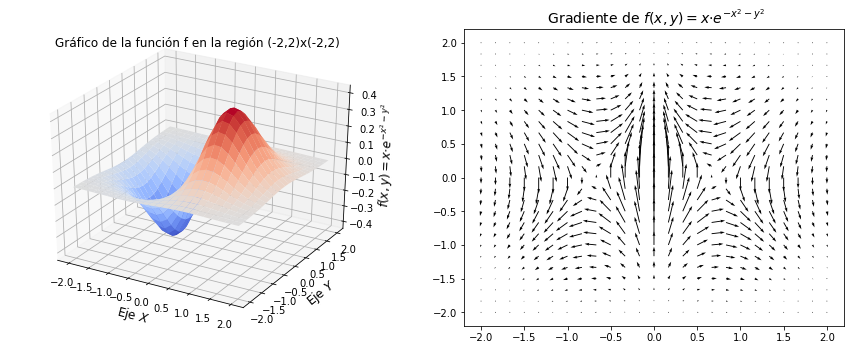

In [ ]:
#---------Graficar-------------
fig = plt.figure(figsize=(15,12))

# Creamos el plano 3D
ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(X, Y, M_f,cmap=cm.coolwarm)
plt.xlabel("Eje $X$", fontsize=12)
plt.ylabel("Eje $Y$", fontsize=12)
txt = ax.set_zlabel(r"$f(x,y) = x⋅e^{-x^2-y^2}$", fontsize=12)
title = ax.set_title("Gráfico de la función f en la región (-2,2)x(-2,2)", fontsize=12)

#Se obtienen las direcciones de los vectores utilizando la función gradiente
dx, dy = np.gradient(M_f) 
ax1 = fig.add_subplot(222)
ax1.quiver(X, Y, dx, dy)
txt = ax1.set_title(r" Gradiente de $f(x,y) = x⋅e^{-x^2-y^2}$", fontsize=14)


# Nano desafío 9: Resolver un sistema de ecuaciones lineales
Resuelva el siguiente sistema de ecuaciones lineales utilizando Matrices y vectores, utilice la libreria numpy:
\begin{align*} 
x − 3y + z &= 2 \\
x + y + z &= 5 \\
−x + 9y + 7z &= 7 \\
\end{align*}

**Hint:** La solucion a la ecuación $AX = B$ corresponde a $X = A^{-1}B$, en donde X es un vector de la forma:
$x = \begin{pmatrix} x \\ y \\ z \end{pmatrix} $.


In [ ]:
# escribe tu código aquí

In [ ]:
assert x-3*y + z == 2
assert x + y + z == 5 
assert -1*x + 9*y + 7*z == 7 

# Anexo: Ejemplos adicionales

## Representación de imagenes con matrices


Por ejemplo, una imagen en un canal corresponde a una matriz que guarda los valores de intensidad que tiene en el respectivo canal. Las imagenes RGB se representan con 3 matrices de $(n,m)$, en donde cada matriz guarda el valor de la cantidad de color que tiene cada canal, luego se combinan para formar un pixel.  

<div  align="center">
<img height="400" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/Pixel.jpg">
</div>
Utilizando la libreria *OpenCV* se pueden leer de forma simple imagenes, luego se utiliza la libreria matplotlib.pyplot para gráficar la imagen. 

**Las imagenes son matrices!!!**

Text(0.5, 1.0, 'Imagen de dimensiones 1163x1077x3')

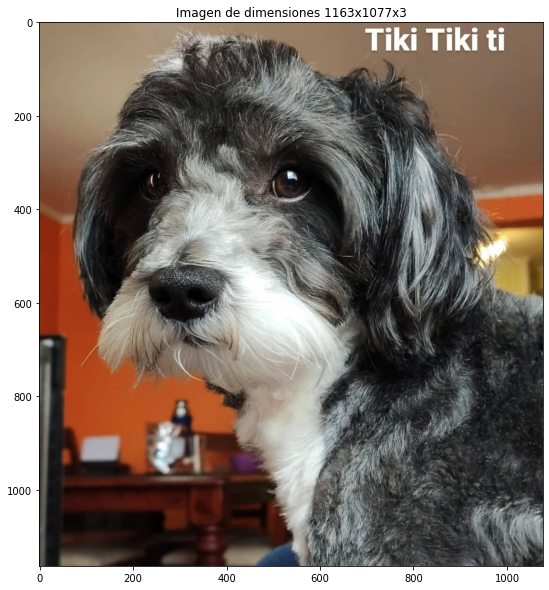

In [ ]:
url = 'https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/toby.jpg'

import cv2 
import matplotlib.pyplot as plt
from skimage import io

image = io.imread(url) 
plt.figure(figsize=([10, 10]))
#plt.axis("off")
plt.imshow(image)
plt.title("Imagen de dimensiones 1163x1077x3")

Veamos la imagen de forma matricial:

In [ ]:
print(image)

[[[152 128 102]
  [152 128 102]
  [152 128 102]
  ...
  [133 106  85]
  [133 106  85]
  [133 106  85]]

 [[152 128 102]
  [152 128 102]
  [152 128 102]
  ...
  [133 106  85]
  [133 106  85]
  [133 106  85]]

 [[152 128 102]
  [152 128 102]
  [152 128 102]
  ...
  [133 106  85]
  [132 105  84]
  [132 105  84]]

 ...

 [[ 77  70  64]
  [ 83  76  70]
  [ 89  82  76]
  ...
  [ 57  59  58]
  [ 58  60  59]
  [ 58  60  59]]

 [[ 78  71  65]
  [ 83  76  70]
  [ 89  82  76]
  ...
  [ 52  54  53]
  [ 53  55  54]
  [ 53  55  54]]

 [[ 78  71  65]
  [ 83  76  70]
  [ 89  82  76]
  ...
  [ 43  45  44]
  [ 44  46  45]
  [ 44  46  45]]]


## Tablas de datos 
Otro uso de las matrices y vectores corresponden a las tablas de datos, estas se pueden guardar en matrices y vectores y generalmente se utiliza esto en Machine learning y en los análisis estadísticos. En general se desea tener una matriz que guarde los datos de entrenamiento y un vector de target. De todas maneras se trabaja primero generalmente con Pandas pues permite tener una mejor visualización de las tablas y luego se pasan los datos numéricos a vectores y matrices de *numpy*.